<a href="https://colab.research.google.com/github/fedhere/MLTSA_FBianco/blob/master/CodeExamples/autoencode_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autoencoder Tutorial

In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense#, Dropout, Flatten
#from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import glob
import pylab as pl
from PIL import Image

%pylab inline

# 1. change kernel to GPU 
go to runtime -> change runtime type -> GPU

# digits first

(10000, 28, 28)

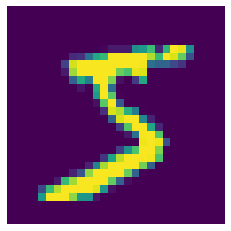

In [45]:
from keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()

img_rows, img_cols = 28, 28
pl.imshow(x_train[0])
pl.axis('off')
intialshape = x_train[0].shape
ndim = np.prod(x_train[0].shape)
x_test.shape

In [46]:
# x_train[0]

In [47]:
x_train.dtype, x_train.max(), x_train.min()


(dtype('uint8'), 255, 0)

In [48]:
x_train = (x_train.astype(float) / 255).reshape(len(x_train), ndim)
x_test = (x_test.astype(float) / 255).reshape(len(x_test), ndim)
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

# create a model

In [5]:
keras.models?

In [49]:
model_digits64 = Sequential()
## encoder
# input layer and the output size
model_digits64.add(Dense(128, activation='relu', input_dim=ndim))
#compression layer
model_digits64.add(Dense(64, activation='relu'))
model_digits64.add(Dense(32, activation='relu'))
## deencoder
#decompression layer, same size as in the encoder
model_digits64.add(Dense(64, activation='relu'))
model_digits64.add(Dense(128, activation='relu'))
#output layer, same size as input
model_digits64.add(Dense(ndim, activation='linear'))


#alternative syntax
"""
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))
"""

'\nencoded = Dense(encoding_dim, activation=\'relu\')(input_img)\n# "decoded" is the lossy reconstruction of the input\ndecoded = Dense(784, activation=\'sigmoid\')(encoded)\n\nautoencoder = Model(input_img, decoded)\n\nencoder = Model(input_img, encoded)\n\n# create a placeholder for an encoded (32-dimensional) input\nencoded_input = Input(shape=(encoding_dim,))\n# retrieve the last layer of the autoencoder model\ndecoder_layer = autoencoder.layers[-1]\n# create the decoder model\ndecoder = Model(encoded_input, decoder_layer(encoded_input))\n'

### regression
- loss='mean_squared_error' L2: default loss to use for regression problems. => linear activation function in output layer, one node out

alternatives:  loss='mean_squared_logarithmic_error', 'mean_absolute_error' (which is L1 instead of L2)
### binary classification

- loss='binary_crossentropy' => sigmoid activation function in output layer, one node out

alternatives: 'hinge'

### multiclass classification
categorical encoded as numerical
- loss='categorical_crossentropy' => softmax n nodes out

onehot encoded categoridal
- 'parse_categorical_crossentropy' => softmax n nodes out

- 'kullback Leibler Divergence Loss' => probabilistic categorical classification; log(P/Q)

## optimizers
- SGD: stocastic gradient descent 
    - nesterov=True -> momentum inclusion
- adam: Adaptive moment estimation. **good in most cases**
- adagrad: different steps for different parameters based on frequency (binary input) well-suited for dealing with sparse data.

- adaDelta: like adagrad but compensated for vanishing learning rate problem

momentum refers to looking one step back and make a decision that includes the slope there

### parameter:
generally you need to adjust the learning rate which is how much you change the parameters by at each step. 
keras.optimizers.Adam(lr=0.001)


https://gitcdn.xyz/cdn/Tony607/blog_statics/e1a0b1e060e783bd1978a141acff897ae71bd021/images/optimizer/optimizer.gif

In [51]:
# choose the optimizer and loss appropriately!
# model_digits64.compile(optimizer="adadelta", loss="mean_squared_error")
model_digits64.compile(optimizer = keras.optimizers.Adadelta(lr=0.01), loss="mean_squared_error")

In [52]:
print(model_digits64.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_19 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_20 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_21 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_22 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_23 (Dense)             (None, 784)               101136    
Total params: 222,384
Trainable params: 222,384
Non-trainable params: 0
________________________________________________

In [53]:
history64 = model_digits64.fit(x_train, x_train, 
                               validation_data=(x_test, x_test),
                               epochs=200, batch_size=100, verbose=1)

Epoch 1/200
600/600 [==============================] - 2s 2ms/step - loss: 0.1138 - val_loss: 0.1132
Epoch 2/200
600/600 [==============================] - 1s 2ms/step - loss: 0.1107 - val_loss: 0.1110
Epoch 3/200
600/600 [==============================] - 1s 2ms/step - loss: 0.1085 - val_loss: 0.1090
Epoch 4/200
600/600 [==============================] - 1s 2ms/step - loss: 0.1067 - val_loss: 0.1071
Epoch 5/200
600/600 [==============================] - 1s 2ms/step - loss: 0.1046 - val_loss: 0.1051
Epoch 6/200
600/600 [==============================] - 1s 2ms/step - loss: 0.1026 - val_loss: 0.1029
Epoch 7/200
600/600 [==============================] - 1s 2ms/step - loss: 0.1006 - val_loss: 0.1003
Epoch 8/200
600/600 [==============================] - 1s 2ms/step - loss: 0.0979 - val_loss: 0.0971
Epoch 9/200
600/600 [==============================] - 1s 2ms/step - loss: 0.0947 - val_loss: 0.0932
Epoch 10/200
600/600 [==============================] - 1s 2ms/step - loss: 0.0909 - val_lo

600/600 [==============================] - 1s 2ms/step - loss: 0.0598 - val_loss: 0.0597
Epoch 82/200
600/600 [==============================] - 1s 2ms/step - loss: 0.0597 - val_loss: 0.0596
Epoch 83/200
600/600 [==============================] - 1s 2ms/step - loss: 0.0596 - val_loss: 0.0595
Epoch 84/200
600/600 [==============================] - 1s 2ms/step - loss: 0.0594 - val_loss: 0.0593
Epoch 85/200
600/600 [==============================] - 1s 2ms/step - loss: 0.0594 - val_loss: 0.0592
Epoch 86/200
600/600 [==============================] - 1s 2ms/step - loss: 0.0593 - val_loss: 0.0591
Epoch 87/200
600/600 [==============================] - 1s 2ms/step - loss: 0.0591 - val_loss: 0.0589
Epoch 88/200
600/600 [==============================] - 1s 2ms/step - loss: 0.0588 - val_loss: 0.0588
Epoch 89/200
600/600 [==============================] - 1s 2ms/step - loss: 0.0586 - val_loss: 0.0586
Epoch 90/200
600/600 [==============================] - 1s 2ms/step - loss: 0.0586 - val_loss: 

Epoch 161/200
600/600 [==============================] - 2s 3ms/step - loss: 0.0477 - val_loss: 0.0472
Epoch 162/200
600/600 [==============================] - 2s 3ms/step - loss: 0.0476 - val_loss: 0.0471
Epoch 163/200
600/600 [==============================] - 1s 2ms/step - loss: 0.0473 - val_loss: 0.0470
Epoch 164/200
600/600 [==============================] - 1s 2ms/step - loss: 0.0473 - val_loss: 0.0469
Epoch 165/200
600/600 [==============================] - 1s 2ms/step - loss: 0.0471 - val_loss: 0.0467
Epoch 166/200
600/600 [==============================] - 1s 2ms/step - loss: 0.0471 - val_loss: 0.0466
Epoch 167/200
600/600 [==============================] - 1s 2ms/step - loss: 0.0470 - val_loss: 0.0465
Epoch 168/200
600/600 [==============================] - 1s 2ms/step - loss: 0.0469 - val_loss: 0.0464
Epoch 169/200
600/600 [==============================] - 1s 2ms/step - loss: 0.0468 - val_loss: 0.0463
Epoch 170/200
600/600 [==============================] - 1s 2ms/step - lo

# always look at the loss!

Text(0.5, 0, 'iteration')

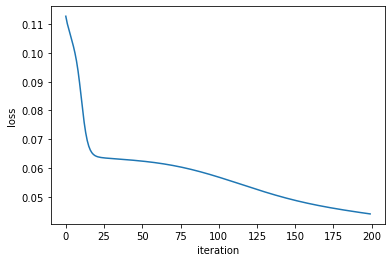

In [54]:
pl.plot(np.array(history64.history['loss']))
pl.ylabel('loss')
pl.xlabel('iteration')
#pl.yscale('log')
#pl.xscale('log')

The loss fuctionis plotted and because it is still decreasingn quite rapidly (slope of the curve not near 0 yet) I know I did not run enough epochs. Try and run for 200 epochs!

# predict

In [55]:
output_image64 = model_digits64.predict(x_test)

In [56]:
def compareinout(i, outim, testimg, initialshape=(28,28)):
  fig = pl.figure(figsize(10,5))
  ax = fig.add_subplot(121) 
  ax.imshow(testimg[i].reshape(initialshape) , cmap="bone")
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  ax = fig.add_subplot(122) 
  ax.imshow(outim[i].reshape(initialshape) , cmap="bone")
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)


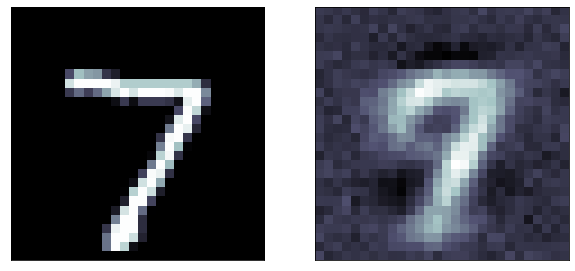

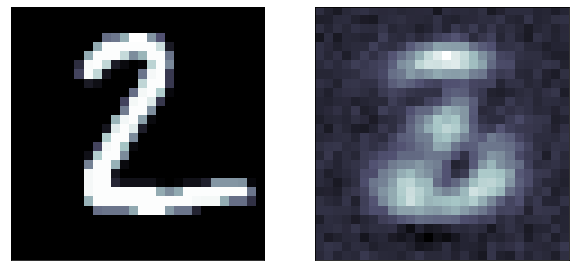

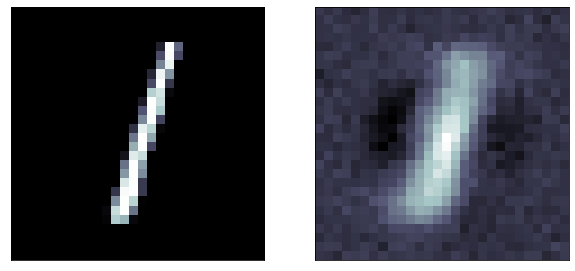

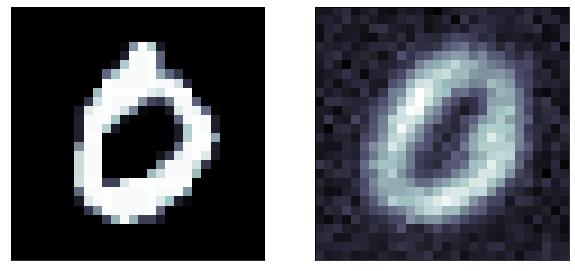

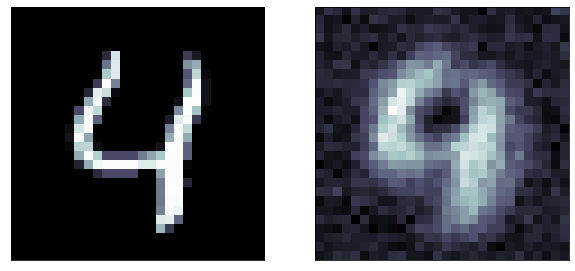

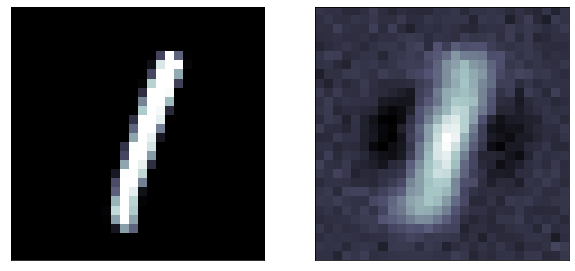

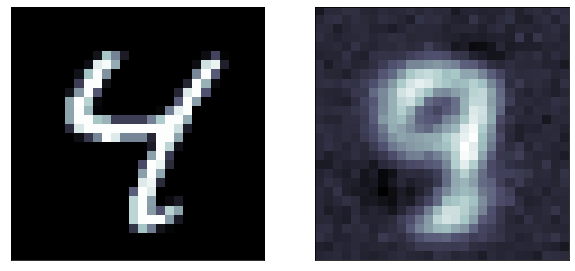

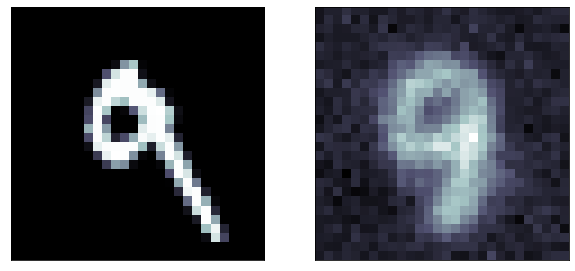

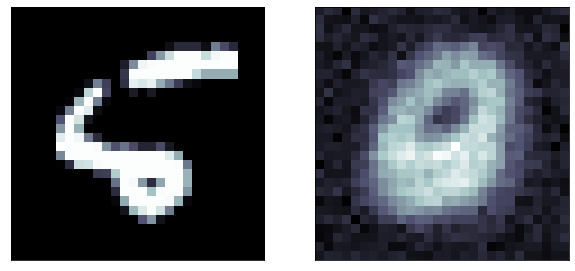

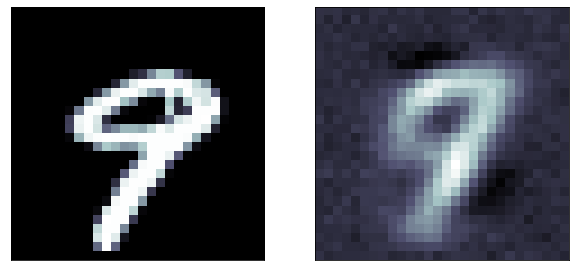

In [57]:
for i in range(10):
  compareinout(i, output_image64, x_test)

This is a rather bad result. Let me see if I can improve it . The images are too detailed. I can treat the problem as a binary problem to derice some detail. To approach a binary classifier I switch the activation function in the last layer to sigmoid

# change loss function

In [58]:
# choose the optimizer and loss appropriately!
model_digits64_sig = Sequential()
## encoder
# input layer and the output size
model_digits64_sig.add(Dense(128, activation='relu', input_dim=ndim))
#compression layer
model_digits64_sig.add(Dense(64, activation='relu'))
## deencoder
#decompression layer, same size as in the encoder
model_digits64_sig.add(Dense(128, activation='relu'))
#output layer, same size as input
model_digits64_sig.add(Dense(ndim, activation='sigmoid'))
# model_digits64_sig.compile(optimizer="adadelta", loss="mean_squared_error") #binary_cross_entropy)
model_digits64_sig.compile(optimizer = keras.optimizers.Adadelta(lr=0.01), loss="mean_squared_error")

In [59]:
history64_sig = model_digits64_sig.fit(x_train, x_train, 
                                       validation_data=(x_test, x_test), 
                                       epochs=200, batch_size=100, verbose=1)

Epoch 1/200
600/600 [==============================] - 2s 3ms/step - loss: 0.2326 - val_loss: 0.2317
Epoch 2/200
600/600 [==============================] - 1s 2ms/step - loss: 0.2313 - val_loss: 0.2306
Epoch 3/200
600/600 [==============================] - 1s 2ms/step - loss: 0.2302 - val_loss: 0.2294
Epoch 4/200
600/600 [==============================] - 1s 2ms/step - loss: 0.2290 - val_loss: 0.2281
Epoch 5/200
600/600 [==============================] - 1s 2ms/step - loss: 0.2276 - val_loss: 0.2263
Epoch 6/200
600/600 [==============================] - 1s 2ms/step - loss: 0.2257 - val_loss: 0.2236
Epoch 7/200
600/600 [==============================] - 2s 3ms/step - loss: 0.2227 - val_loss: 0.2191
Epoch 8/200
600/600 [==============================] - 1s 2ms/step - loss: 0.2174 - val_loss: 0.2107
Epoch 9/200
600/600 [==============================] - 1s 2ms/step - loss: 0.2075 - val_loss: 0.1943
Epoch 10/200
600/600 [==============================] - 2s 3ms/step - loss: 0.1883 - val_lo

600/600 [==============================] - 1s 2ms/step - loss: 0.0670 - val_loss: 0.0673
Epoch 82/200
600/600 [==============================] - 1s 2ms/step - loss: 0.0673 - val_loss: 0.0672
Epoch 83/200
600/600 [==============================] - 1s 2ms/step - loss: 0.0671 - val_loss: 0.0672
Epoch 84/200
600/600 [==============================] - 1s 2ms/step - loss: 0.0671 - val_loss: 0.0671
Epoch 85/200
600/600 [==============================] - 1s 2ms/step - loss: 0.0670 - val_loss: 0.0670
Epoch 86/200
600/600 [==============================] - 1s 2ms/step - loss: 0.0669 - val_loss: 0.0670
Epoch 87/200
600/600 [==============================] - 1s 2ms/step - loss: 0.0669 - val_loss: 0.0669
Epoch 88/200
600/600 [==============================] - 1s 2ms/step - loss: 0.0668 - val_loss: 0.0668
Epoch 89/200
600/600 [==============================] - 1s 2ms/step - loss: 0.0667 - val_loss: 0.0668
Epoch 90/200
600/600 [==============================] - 1s 2ms/step - loss: 0.0667 - val_loss: 

Epoch 161/200
600/600 [==============================] - 1s 2ms/step - loss: 0.0581 - val_loss: 0.0578
Epoch 162/200
600/600 [==============================] - 1s 2ms/step - loss: 0.0580 - val_loss: 0.0577
Epoch 163/200
600/600 [==============================] - 1s 2ms/step - loss: 0.0580 - val_loss: 0.0575
Epoch 164/200
600/600 [==============================] - 1s 2ms/step - loss: 0.0577 - val_loss: 0.0574
Epoch 165/200
600/600 [==============================] - 1s 2ms/step - loss: 0.0577 - val_loss: 0.0573
Epoch 166/200
600/600 [==============================] - 1s 2ms/step - loss: 0.0575 - val_loss: 0.0571
Epoch 167/200
600/600 [==============================] - 1s 2ms/step - loss: 0.0573 - val_loss: 0.0570
Epoch 168/200
600/600 [==============================] - 1s 2ms/step - loss: 0.0572 - val_loss: 0.0569
Epoch 169/200
600/600 [==============================] - 1s 2ms/step - loss: 0.0571 - val_loss: 0.0567
Epoch 170/200
600/600 [==============================] - 1s 2ms/step - lo

Text(0.5, 0, 'iteration')

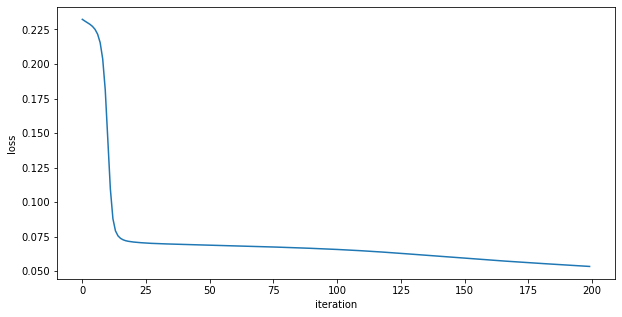

In [60]:
pl.plot(np.array(history64_sig.history['loss']))
pl.ylabel('loss')
pl.xlabel('iteration')
#pl.yscale('log')
#pl.xscale('log')

The loss fuctionis plotted and because it is still decreasingn quite rapidly (slope of the curve not near 0 yet) I know I did not run enough epochs. Try and run for 200 epochs!

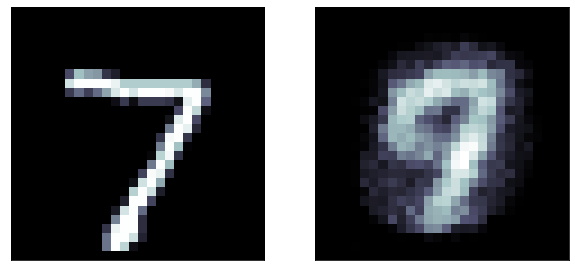

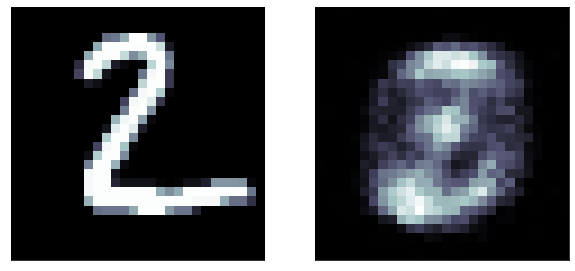

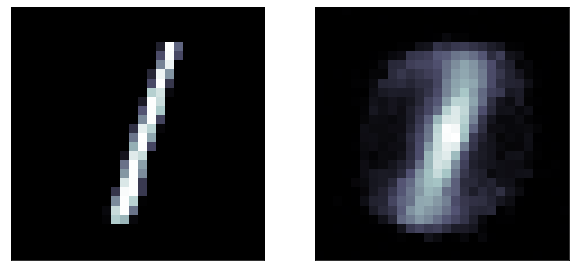

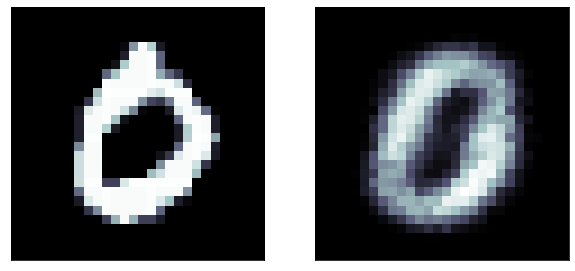

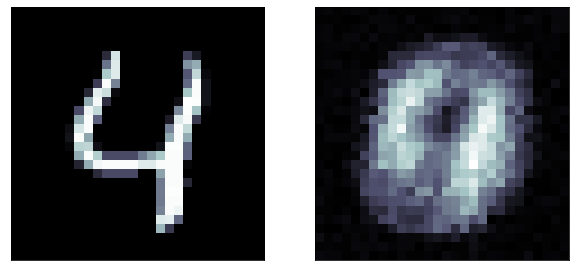

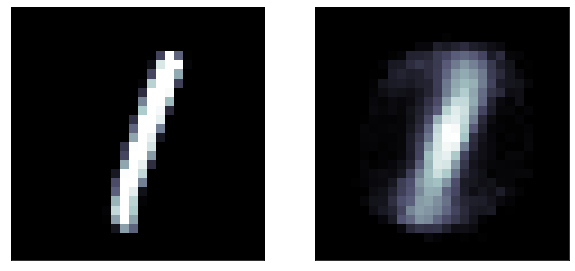

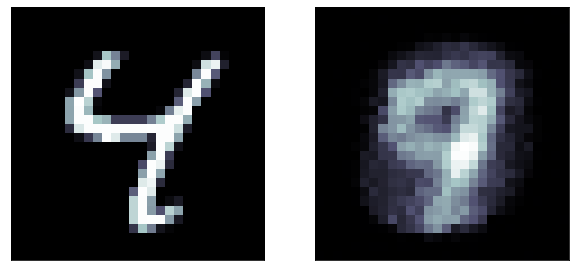

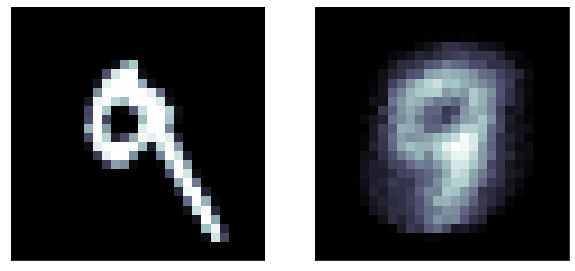

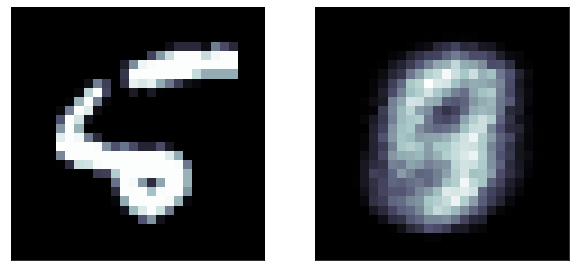

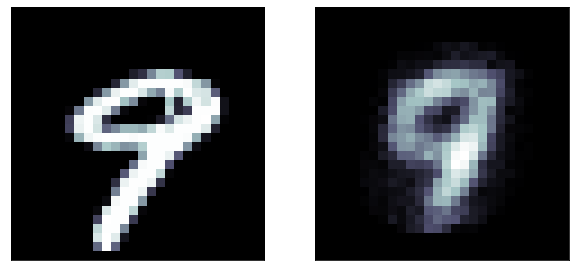

In [61]:
output_image64_sig = model_digits64_sig.predict(x_test)
for i in range(10):
  compareinout(i, output_image64_sig, x_test)

Much better! Let me choose a loss function that is more appropriate for a nbinary classificaton.

In [62]:
# sigmoid and binary cross entropy loss
model_digits64_bce = model_digits64_sig

In [63]:
# model_digits64_bce.compile(optimizer="adadelta", loss="binary_crossentropy")
model_digits64_bce.compile(optimizer = keras.optimizers.Adadelta(lr=0.01), loss="binary_crossentropy")
history64_bce = model_digits64_bce.fit(x_train, x_train, 
                                       validation_data=(x_test, x_test), 
                                       epochs=20, batch_size=100, verbose=1)

Epoch 1/20
600/600 [==============================] - 2s 3ms/step - loss: 0.2363 - val_loss: 0.2318
Epoch 2/20
600/600 [==============================] - 2s 3ms/step - loss: 0.2327 - val_loss: 0.2299
Epoch 3/20
600/600 [==============================] - 2s 3ms/step - loss: 0.2314 - val_loss: 0.2284
Epoch 4/20
600/600 [==============================] - 2s 3ms/step - loss: 0.2298 - val_loss: 0.2272
Epoch 5/20
600/600 [==============================] - 2s 3ms/step - loss: 0.2284 - val_loss: 0.2261
Epoch 6/20
600/600 [==============================] - 1s 2ms/step - loss: 0.2274 - val_loss: 0.2250
Epoch 7/20
600/600 [==============================] - 2s 3ms/step - loss: 0.2262 - val_loss: 0.2240
Epoch 8/20
600/600 [==============================] - 1s 2ms/step - loss: 0.2255 - val_loss: 0.2230
Epoch 9/20
600/600 [==============================] - 1s 2ms/step - loss: 0.2245 - val_loss: 0.2220
Epoch 10/20
600/600 [==============================] - 1s 2ms/step - loss: 0.2234 - val_loss: 0.2210

Text(0.5, 0, 'iteration')

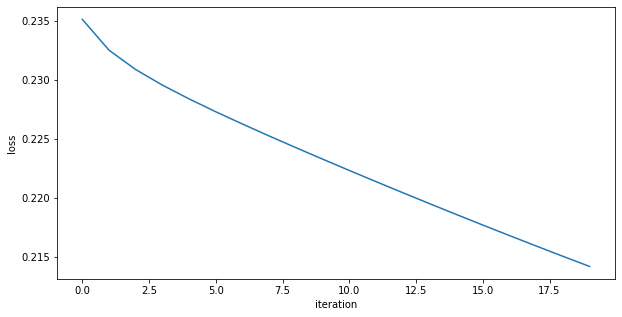

In [64]:
pl.plot(np.array(history64_bce.history['loss']))
pl.ylabel('loss')
pl.xlabel('iteration')
#pl.yscale('log')
#pl.xscale('log')

This loss fuction is also decreasing to steeply. Too few epochs!

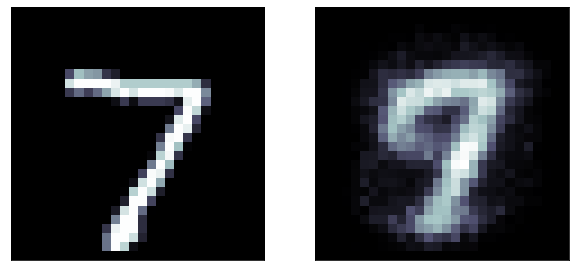

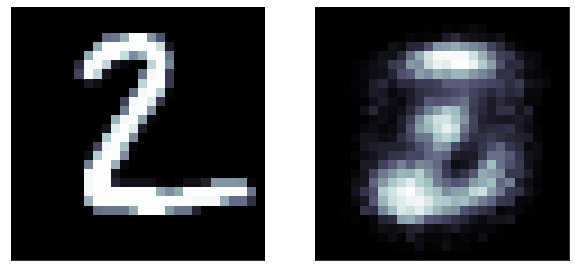

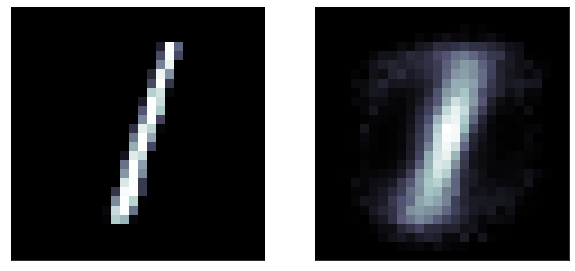

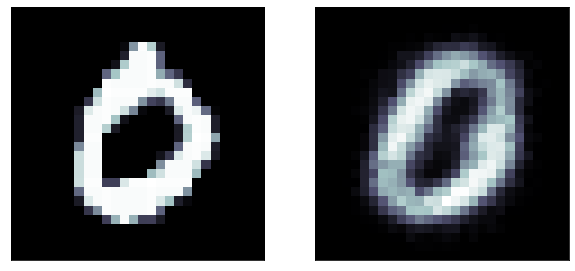

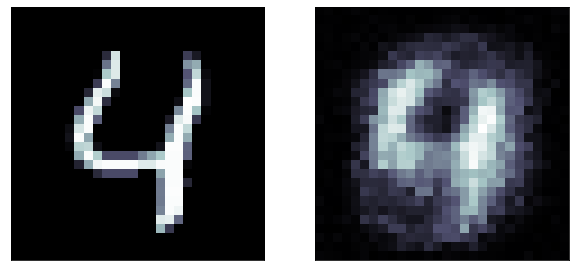

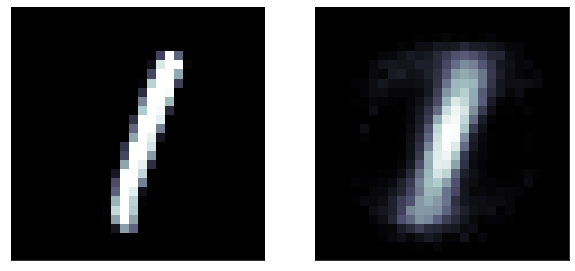

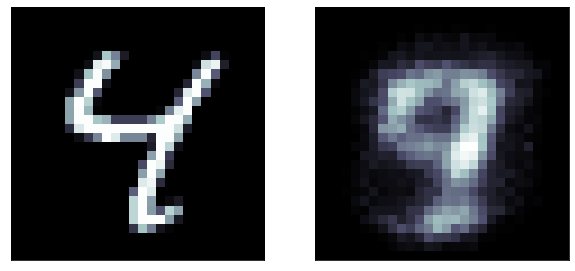

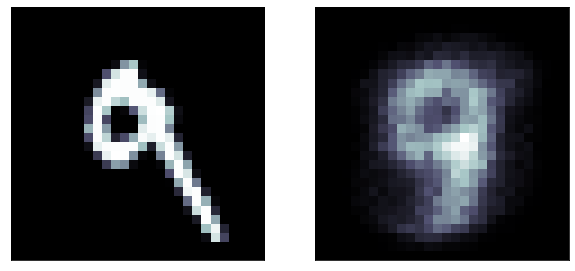

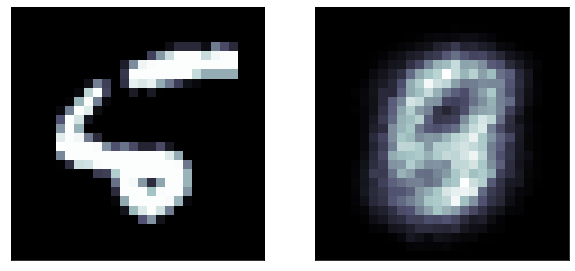

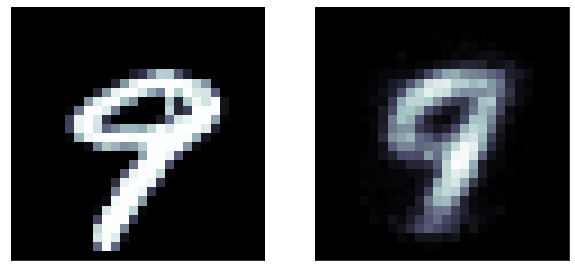

In [65]:
output_image64_bce = model_digits64_bce.predict(x_test)
for i in range(10):
  compareinout(i, output_image64_bce, x_test)

This is a pretty good result!

Text(0.5, 1.0, 'the 3 loss functions, log scale')

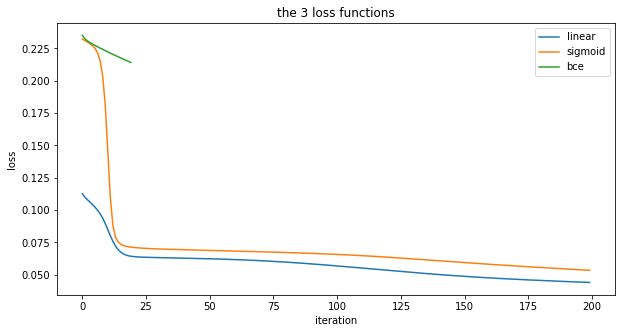

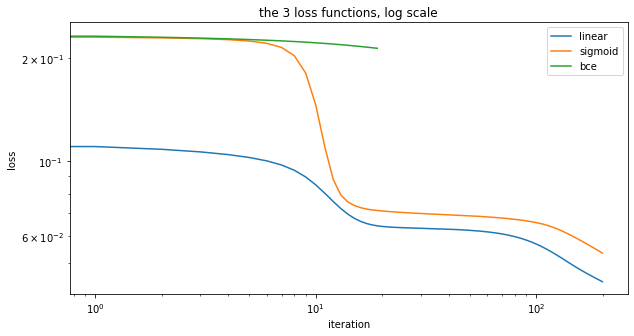

In [66]:
pl.plot(np.array(history64.history['loss']), label="linear")
pl.plot(np.array(history64_sig.history['loss']), label="sigmoid")
pl.plot(np.array(history64_bce.history['loss']), label="bce")
pl.ylabel('loss')
pl.xlabel('iteration')
pl.legend()
pl.title("the 3 loss functions")
pl.figure()
pl.plot(np.array(history64.history['loss']), label="linear")
pl.plot(np.array(history64_sig.history['loss']), label="sigmoid")
pl.plot(np.array(history64_bce.history['loss']), label="bce")
pl.ylabel('loss')
pl.xlabel('iteration')
pl.xscale('log')
pl.yscale('log')
pl.legend()
pl.title("the 3 loss functions, log scale")

All loss functions plotted: topin natural, bottomin logscale for enhanced visibility. It does not look like any of them is done learning (all decreasing rapidly still), especially the one for the the sigmoid-based mean square error loss.

# try more compression

Now we shrink the bottle neck to 16 neurons: a much more ambitions model!

In [67]:
model_digits = Sequential()
#encoder
model_digits.add(Dense(128, activation='relu', input_dim=ndim))
model_digits.add(Dense(64, activation='relu'))
model_digits.add(Dense(32, activation='relu'))
#bottle neck
model_digits.add(Dense(16, activation='relu'))
#decoder
model_digits.add(Dense(32, activation='relu'))
model_digits.add(Dense(64, activation='relu'))
model_digits.add(Dense(128, activation='relu'))
model_digits.add(Dense(ndim, activation='sigmoid'))


In [68]:
# model_digits.compile(optimizer="adadelta", loss="binary_crossentropy")
model_digits.compile(optimizer = keras.optimizers.Adadelta(lr=0.01), loss="binary_crossentropy")

In [69]:
print(model_digits.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_29 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_30 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_31 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_32 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_33 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_34 (Dense)             (None, 128)              

In [70]:
history = model_digits.fit(x_train, x_train, epochs=200, batch_size=100, verbose=1)

Epoch 1/200
600/600 [==============================] - 2s 2ms/step - loss: 0.6927
Epoch 2/200
600/600 [==============================] - 1s 2ms/step - loss: 0.6910
Epoch 3/200
600/600 [==============================] - 1s 2ms/step - loss: 0.6892
Epoch 4/200
600/600 [==============================] - 1s 2ms/step - loss: 0.6869
Epoch 5/200
600/600 [==============================] - 1s 2ms/step - loss: 0.6831
Epoch 6/200
600/600 [==============================] - 1s 2ms/step - loss: 0.6727
Epoch 7/200
600/600 [==============================] - 1s 2ms/step - loss: 0.6004
Epoch 8/200
600/600 [==============================] - 1s 2ms/step - loss: 0.3380
Epoch 9/200
600/600 [==============================] - 1s 2ms/step - loss: 0.2806
Epoch 10/200
600/600 [==============================] - 1s 2ms/step - loss: 0.2746
Epoch 11/200
600/600 [==============================] - 1s 2ms/step - loss: 0.2715
Epoch 12/200
600/600 [==============================] - 1s 2ms/step - loss: 0.2703
Epoch 13/200


600/600 [==============================] - 1s 2ms/step - loss: 0.2424
Epoch 100/200
600/600 [==============================] - 1s 2ms/step - loss: 0.2421
Epoch 101/200
600/600 [==============================] - 1s 2ms/step - loss: 0.2414
Epoch 102/200
600/600 [==============================] - 1s 2ms/step - loss: 0.2420
Epoch 103/200
600/600 [==============================] - 1s 2ms/step - loss: 0.2415
Epoch 104/200
600/600 [==============================] - 1s 2ms/step - loss: 0.2409
Epoch 105/200
600/600 [==============================] - 1s 2ms/step - loss: 0.2411
Epoch 106/200
600/600 [==============================] - 1s 2ms/step - loss: 0.2408
Epoch 107/200
600/600 [==============================] - 1s 2ms/step - loss: 0.2404
Epoch 108/200
600/600 [==============================] - 1s 2ms/step - loss: 0.2408
Epoch 109/200
600/600 [==============================] - 1s 2ms/step - loss: 0.2397
Epoch 110/200
600/600 [==============================] - 1s 2ms/step - loss: 0.2396
Epoch 

600/600 [==============================] - 1s 2ms/step - loss: 0.2191
Epoch 197/200
600/600 [==============================] - 1s 2ms/step - loss: 0.2190
Epoch 198/200
600/600 [==============================] - 1s 2ms/step - loss: 0.2192
Epoch 199/200
600/600 [==============================] - 1s 2ms/step - loss: 0.2183
Epoch 200/200
600/600 [==============================] - 1s 2ms/step - loss: 0.2187


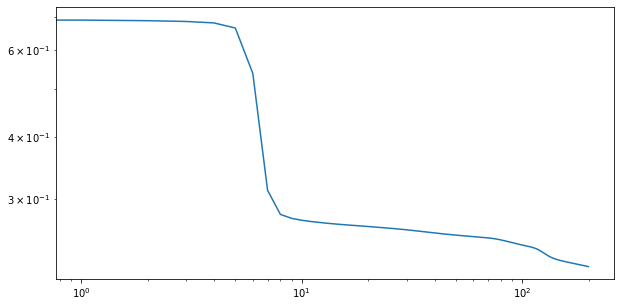

In [71]:
pl.plot(np.array(history.history['loss']))
pl.yscale('log')
pl.xscale('log')

the loss fuction: once again it did not finish learning. 

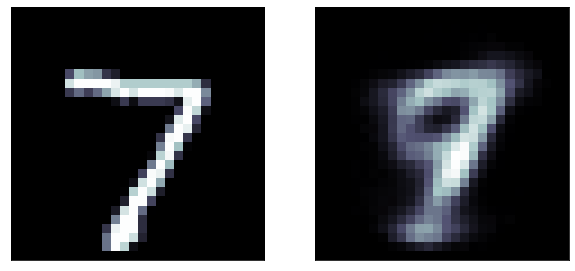

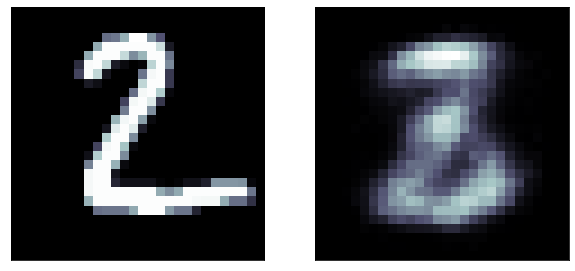

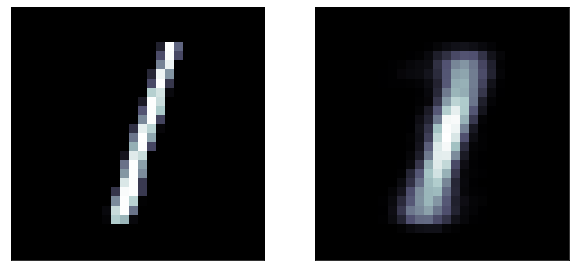

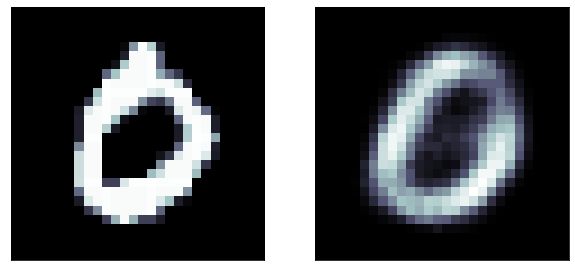

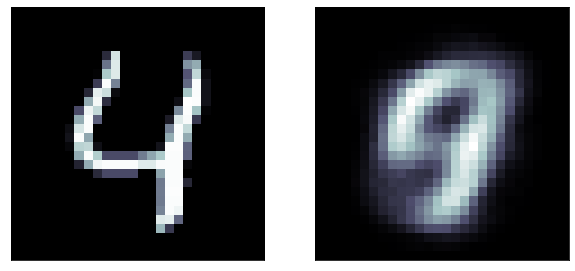

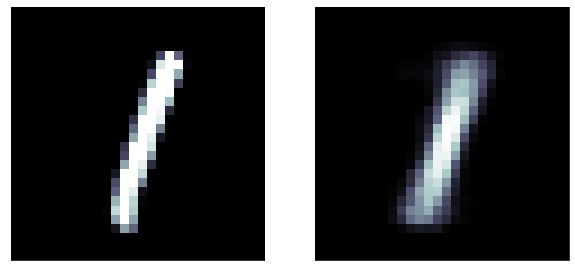

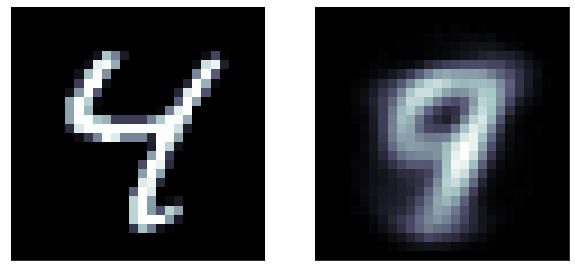

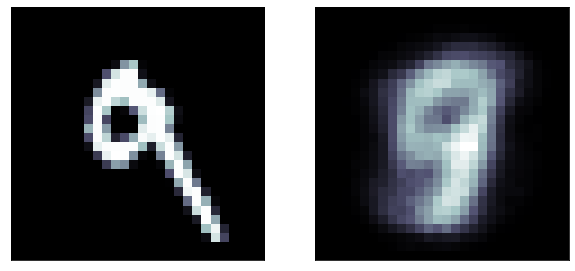

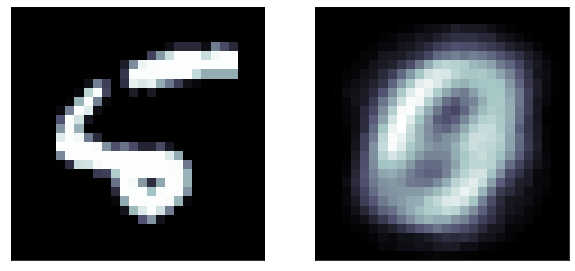

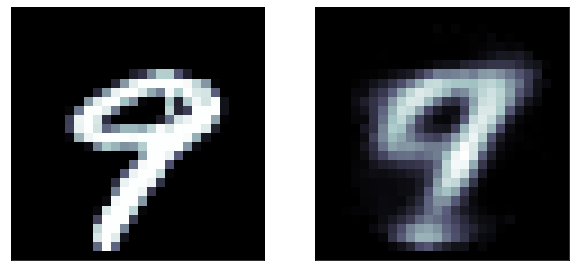

In [72]:
output_image = model_digits.predict(x_test)

for i in range(10):
  compareinout(i, output_image, x_test)

The result is not bad! The decoder can recreate the image from only 16 numbers!

# Extract feature

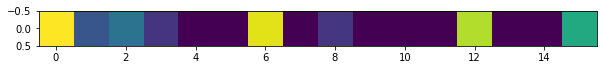

In [73]:
from keras import backend as K
# input placeholder
inp = model_digits.input                   
# extract the bottle neck outputs
outputs = model_digits.layers[3].output     
# create a function to evaluate the output of the bottle neck layer for a given input
functors = K.function([inp], [outputs])    

# Testing
layer_outs = functors(x_test[:1])
pl.imshow(layer_outs[0]);

This is the reducted representation of the first image in the test sample: a 16-values representation of the NxN pixel image

In [74]:
def compareinout_encoded(i, outim, testimg, initialshape=(28,28)):
    fig = pl.figure(figsize(10,5))
    ax = fig.add_subplot(131) 
    ax.imshow(testimg[i].reshape(initialshape) , cmap="bone")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = fig.add_subplot(132)
    pl.imshow(functors(testimg[i:i+1])[0])
    pl.yticks([])
    ax = fig.add_subplot(133) 
    ax.imshow(outim[i].reshape(initialshape) , cmap="bone")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


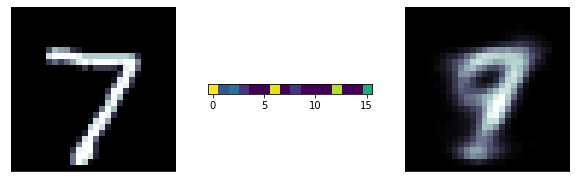

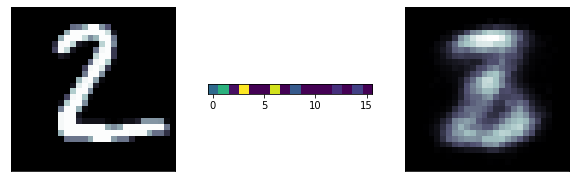

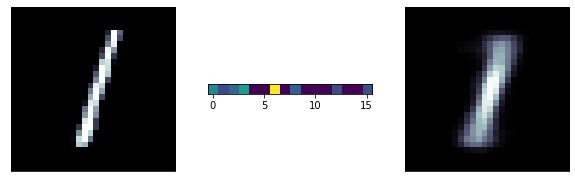

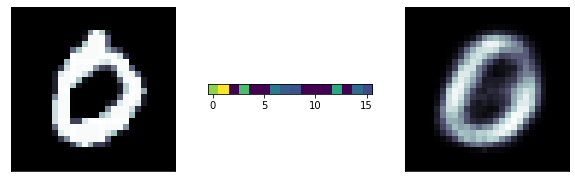

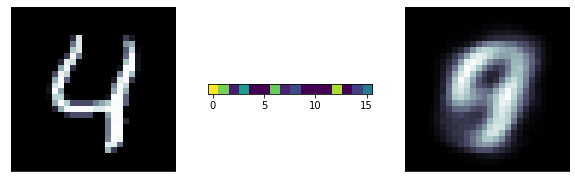

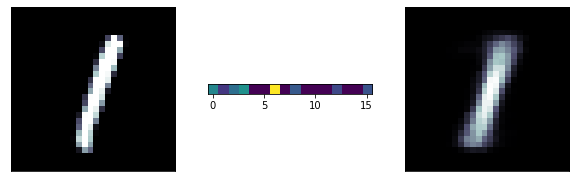

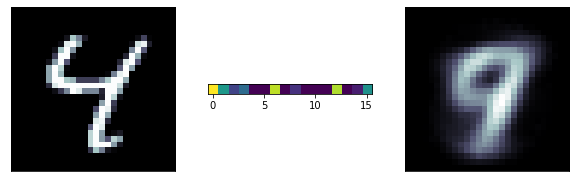

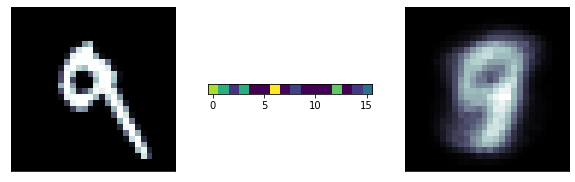

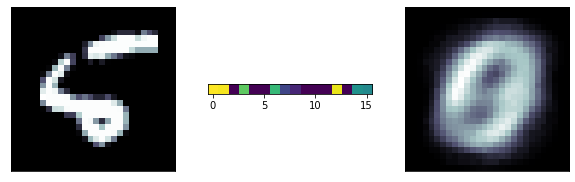

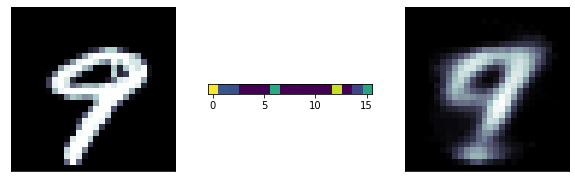

In [75]:
for i in range(10):
  compareinout_encoded(i, output_image, x_test)

left: original imate

center: compressed representation

right: predicted image